In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

functions

In [2]:
def failurezone(sH, sh, sv, pm, po, poisson, sw, miuw, gamma, alphaw, betaw):

    x_store = np.linspace(-axisrange, axisrange, 101)
    y_store = np.linspace(-axisrange, axisrange, 101)
    xw_plot = []
    yw_plot = []
    zw_plot = []
    l_store = []

    for x in x_store:
        for y in y_store:
        
            if x**2+y**2 >= 1:
            
                r = np.sqrt(x**2+y**2)
                cos_t = x/r
                sin_t = y/r
                cos_2t = cos_t**2-sin_t**2
                sin_2t = 2*cos_t*sin_t
            
                sr  =  (sH+sh)/2*(1-(1/r)**2)+(sH-sh)/2*(1-4*(1/r)**2+3*(1/r)**4)*cos_2t+pm*(1/r)**2
                st  =  (sH+sh)/2*(1+(1/r)**2)-(sH-sh)/2*(1+3*(1/r)**4)*cos_2t-pm*(1/r)**2
                srt = -(sH-sh)/2*(1+2*(1/r)**2-3*(1/r)**4)*sin_2t
                sz  =   sv-2*poisson*(sH-sh)*(1/r)**2*cos_2t
            
                s_polar   = np.array([[sr, srt, 0],
                                      [srt, st, 0],
                                      [0,   0,  sz]])
                polar_xyz = np.array([[cos_t, -sin_t, 0],
                                      [sin_t,  cos_t, 0],
                                      [0,      0,     1]])
                xyz_W     = np.array([[ np.cos(alphaw)*np.cos(betaw),  np.sin(alphaw)*np.cos(betaw), -np.sin(betaw)],
                                      [-np.sin(alphaw),                np.cos(alphaw),               0],
                                      [ np.cos(alphaw)*np.sin(betaw),  np.sin(alphaw)*np.sin(betaw), np.cos(betaw)]])
            
                s_xyz = np.matmul(np.matmul(polar_xyz, s_polar), polar_xyz.transpose())
                s_W   = np.matmul(np.matmul(xyz_W, s_xyz), xyz_W.transpose())
            
                sz_w  = s_W[2,2]
                szx_w = s_W[2,0]
                szy_w = s_W[2,1]
            
                if   (sz_w-po+gamma*(po-pm)) > 0:
                    l = np.sqrt(szx_w**2+szy_w**2)-sw-miuw*(sz_w-po+gamma*(po-pm))
                else:
                    l = np.sqrt(szx_w**2+szy_w**2)-sw
                
                if l > 0:
                    z = -np.cos(alphaw)*np.sin(betaw)/np.cos(betaw)*x-np.sin(alphaw)*np.sin(betaw)/np.cos(betaw)*y
                    xw_plot.append(x)
                    yw_plot.append(y)
                    zw_plot.append(z)
                    l_store.append(l)
    return xw_plot, yw_plot, zw_plot, l_store

plot lmax with pm

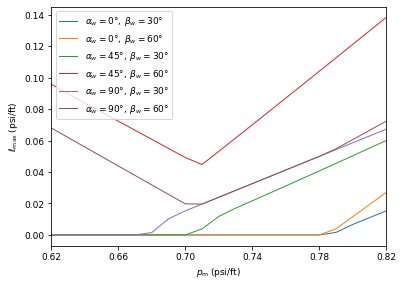

In [6]:
sH      = 0.9
sh      = 0.7
sv      = 0.8
po      = 0.46
poisson = 0.35
cw      = 0.054
miuw    = 0.466
alphaw_storage  = [0, 0, np.pi/4, np.pi/4, np.pi/2, np.pi/2]
betaw_storage   = [np.pi/6, np.pi/3, np.pi/6, np.pi/3, np.pi/6, np.pi/3]
gamma   = 0.7

axisrange    = 2
holeradius   = 1

fig = plt.figure(figsize=(6, 4.4))

pm_storage    = [0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82]
color_storage = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i in range(6):
    
    alphaw = alphaw_storage[i]
    betaw = betaw_storage[i]
    l_store_max   = []    
    
    for j in range(21):
    
        pm = pm_storage[j]
        xw_plot, yw_plot, zw_plot, l_store = failurezone(sH, sh, sv, pm, po, poisson, cw, miuw, gamma, alphaw, betaw)
    
        if l_store == []:  
            l_store_max.append(0)
        else: 
            l_store_max.append(max(l_store))
            
    plt.subplot(111)
    plt.plot(pm_storage, l_store_max, linewidth = 1, color = color_storage[i])

plt.legend([r'$\alpha_{w}=0\degree,\:\beta_{w}=30\degree$',r'$\alpha_{w}=0\degree,\:\beta_{w}=60\degree$',r'$\alpha_{w}=45\degree,\:\beta_{w}=30\degree$',r'$\alpha_{w}=45\degree,\:\beta_{w}=60\degree$',r'$\alpha_{w}=90\degree,\:\beta_{w}=30\degree$',r'$\alpha_{w}=90\degree,\:\beta_{w}=60\degree$'],fontsize=9,loc='upper left')
plt.xlim(0.62, 0.82)
plt.xticks([0.62,0.66,0.7,0.74,0.78,0.82],fontsize=9)
plt.xlabel(r'$p_{\mathrm{m}}\:\left(\mathrm{psi/ft}\right)$',fontsize=9)
plt.yticks([0,0.02,0.04,0.06,0.08,0.1,0.12,0.14],fontsize=9)
plt.ylabel(r'$\ell_{\mathrm{max}}\:\left(\mathrm{psi/ft}\right)$',fontsize=9)
plt.show()
fig.savefig('sensitivitys.pdf')

